In [ ]:
#!unzip 7342422066d511eb.zip

Archive:  7342422066d511eb.zip
   creating: dataset/
  inflating: dataset/train.csv       
  inflating: dataset/test.csv        
  inflating: dataset/sample_submission.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df_train=pd.read_csv("/content/dataset/train.csv",parse_dates=["Scheduled Date",	"Delivery Date"])
df_train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23


In [ ]:
len(df_train)

6500

In [ ]:
df_train=df_train[df_train["Cost"]>-2000 ]
df_train=df_train[df_train["Cost"]<100000 ]

In [ ]:
len(df_train)

6255

In [ ]:
print("Length of Dataset :",df_train.shape[0])
#print(df_train.head())
print(df_train.info())

Length of Dataset : 6255
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6255 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Id            6255 non-null   object        
 1   Artist Name            6255 non-null   object        
 2   Artist Reputation      5532 non-null   float64       
 3   Height                 5895 non-null   float64       
 4   Width                  5691 non-null   float64       
 5   Weight                 5689 non-null   float64       
 6   Material               5526 non-null   object        
 7   Price Of Sculpture     6255 non-null   float64       
 8   Base Shipping Price    6255 non-null   float64       
 9   International          6255 non-null   object        
 10  Express Shipment       6255 non-null   object        
 11  Installation Included  6255 non-null   object        
 12  Transport              4914 non-null 

In [ ]:
df_train.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5532.000000,5895.000000,5691.000000,5.689000e+03,6255.000000,6255.000000,6255.000000
mean,0.455624,21.275148,9.351959,1.821004e+05,462.167277,36.371621,2534.109372
std,0.264791,11.753893,5.178026,8.997945e+05,2219.750347,26.506926,8802.869620
min,0.000000,3.000000,2.000000,3.000000e+00,3.000000,10.000000,-1974.930000
25%,0.230000,12.000000,6.000000,4.730000e+02,5.175000,16.445000,192.065000
50%,0.440000,20.000000,8.000000,2.710000e+03,6.970000,22.960000,382.530000
75%,0.670000,29.000000,12.000000,2.611100e+04,64.520000,55.190000,1076.170000
max,1.000000,73.000000,50.000000,1.938877e+07,38903.180000,99.980000,97425.400000


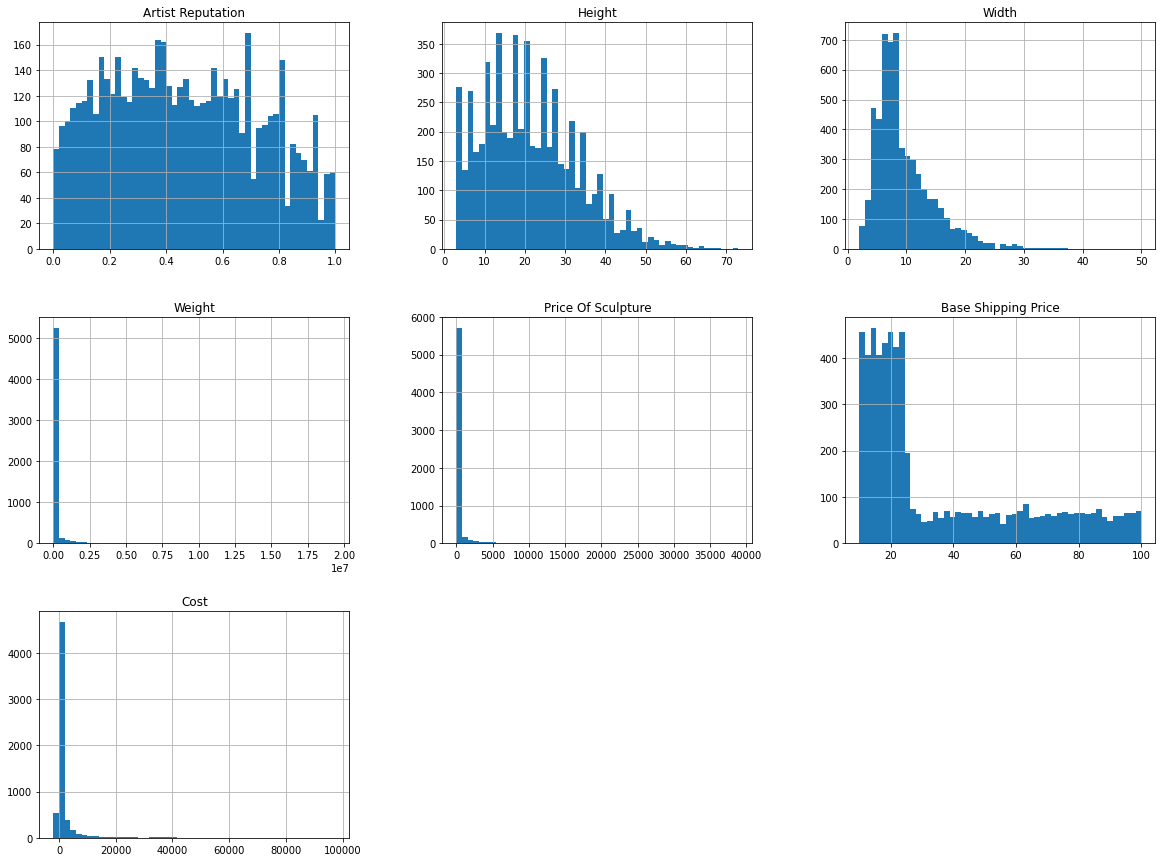

In [ ]:
df_train.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
test_set=pd.read_csv("/content/dataset/test.csv",parse_dates=["Scheduled Date",	"Delivery Date"])

In [ ]:
print(df_train.isna().sum())
print("="*50)
print(test_set.isna().sum())

Customer Id                 0
Artist Name                 0
Artist Reputation         723
Height                    360
Width                     564
Weight                    566
Material                  729
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1341
Fragile                     0
Customer Information        0
Remote Location           746
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64
Customer Id                0
Artist Name                0
Artist Reputation        222
Height                   119
Width                    141
Weight                   149
Material                   0
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                232
Fragile   

In [ ]:
categorical_columns=[]
numerical_columns=[]
for x in df_train.columns:
  if df_train[x].dtype==object:
    categorical_columns.append(x)
  else:
    numerical_columns.append(x)

In [ ]:
numerical_columns

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Scheduled Date',
 'Delivery Date',
 'Cost']

In [ ]:
df_train["Days_Taken"]=(df_train["Scheduled Date"]-df_train["Delivery Date"]).dt.days
test_set["Days_Taken"]=(test_set["Scheduled Date"]-test_set["Delivery Date"]).dt.days
df_train["Days_Taken"].value_counts()
numerical_columns.append("Days_Taken")

In [ ]:
df_train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,Days_Taken
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29,4
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96,1
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29,1
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16,4
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23,4


In [ ]:
categorical_columns

['Customer Id',
 'Artist Name',
 'Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location',
 'Customer Location']

In [ ]:
numerical_columns

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Scheduled Date',
 'Delivery Date',
 'Cost',
 'Days_Taken']

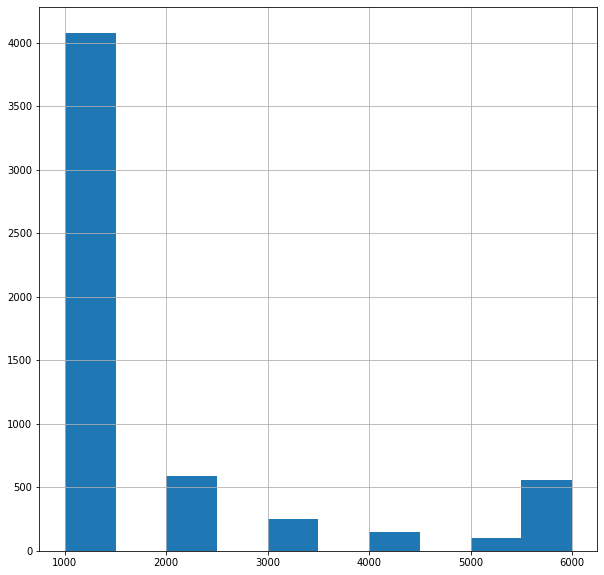

In [ ]:
pd.cut(df_train["Cost"],
    bins=[0,1000,2000,3000,4000,5000,np.inf],
    labels=[1000,2000,3000,4000,5000,6000]
).hist(figsize=(10,10))

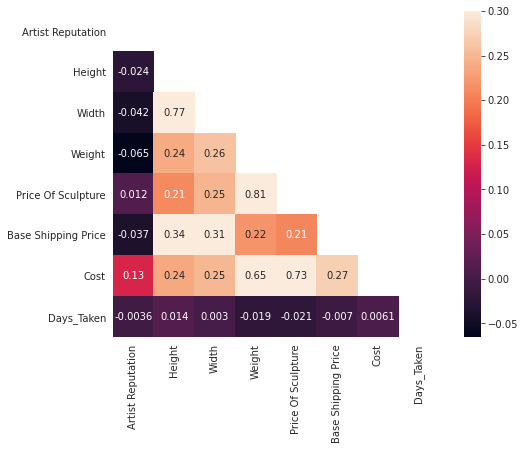

In [ ]:
import seaborn as sns
corr=df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 6))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd02261ed50>,
      dtype=object)

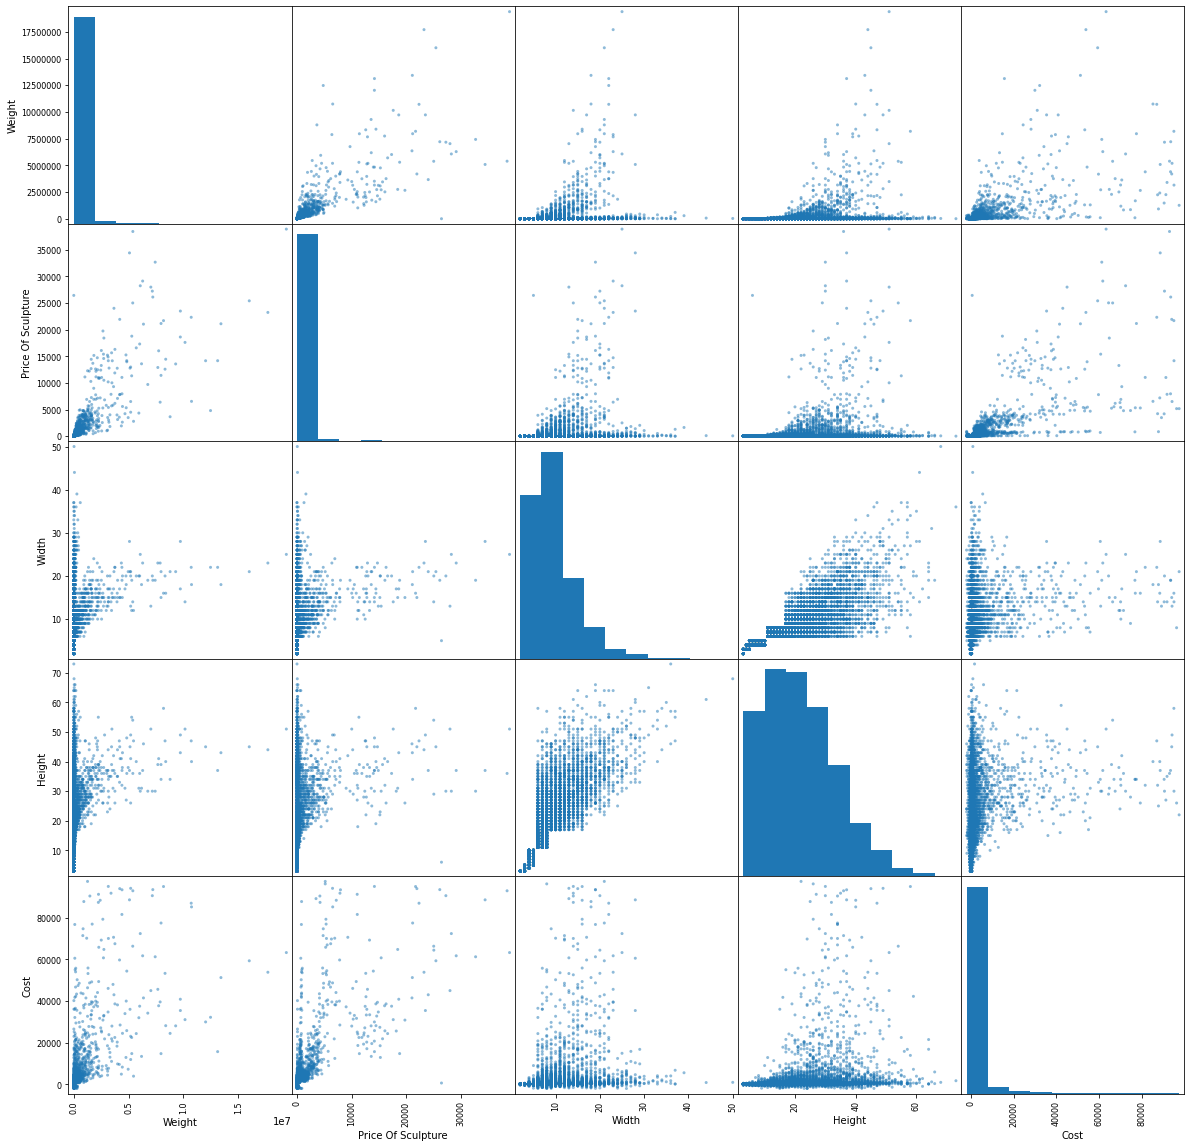

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_train[["Weight","Price Of Sculpture","Width","Height","Cost"]],figsize=(20,20))

In [ ]:
df_train.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost',
       'Days_Taken'],
      dtype='object')

In [ ]:
df_train.drop(["Price Of Sculpture","Customer Location"],axis=1,inplace=True)
test_set.drop(["Price Of Sculpture","Customer Location"],axis=1,inplace=True)
numerical_columns.remove("Price Of Sculpture")
categorical_columns.remove("Customer Location")

In [ ]:
 from sklearn.model_selection import train_test_split
 train_set,valid_set=train_test_split(df_train,test_size=0.2,random_state=42)

In [ ]:
train_set.drop(["Customer Id","Artist Name"],axis=1,inplace=True)
test_set.drop(["Customer Id","Artist Name"],axis=1,inplace=True)
valid_set.drop(["Customer Id","Artist Name"],axis=1,inplace=True)
categorical_columns.remove("Customer Id")
categorical_columns.remove("Artist Name")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
for x in categorical_columns:
  print("="*25,x,"="*25)
  print(train_set[x].value_counts())

========================= Material =========================
Aluminium    698
Brass        674
Wood         653
Clay         644
Bronze       630
Marble       600
Stone        514
Name: Material, dtype: int64
========================= International =========================
No     3312
Yes    1692
Name: International, dtype: int64
========================= Express Shipment =========================
No     3383
Yes    1621
Name: Express Shipment, dtype: int64
========================= Installation Included =========================
No     3012
Yes    1992
Name: Installation Included, dtype: int64
========================= Transport =========================
Roadways     1598
Airways      1387
Waterways     965
Name: Transport, dtype: int64
========================= Fragile =========================
No     4210
Yes     794
Name: Fragile, dtype: int64
========================= Customer Information =========================
Working Class    3675
Wealthy          1329
Name: Customer Informa

In [ ]:
train_set.columns

Index(['Artist Reputation', 'Height', 'Width', 'Weight', 'Material',
       'Base Shipping Price', 'International', 'Express Shipment',
       'Installation Included', 'Transport', 'Fragile', 'Customer Information',
       'Remote Location', 'Scheduled Date', 'Delivery Date', 'Cost',
       'Days_Taken'],
      dtype='object')

In [ ]:
train_set.drop(['Scheduled Date', 'Delivery Date'],axis=1,inplace=True)
test_set.drop(['Scheduled Date', 'Delivery Date'],axis=1,inplace=True)
valid_set.drop(['Scheduled Date', 'Delivery Date'],axis=1,inplace=True)
numerical_columns.remove("Scheduled Date")
numerical_columns.remove("Delivery Date")


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


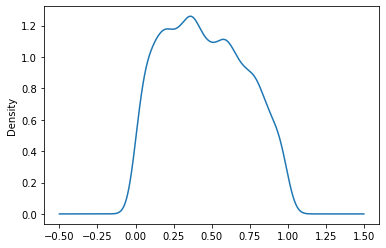

In [ ]:
df_train["Artist Reputation"].plot.kde()

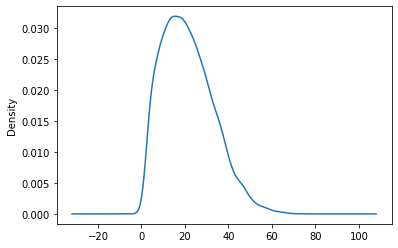

In [ ]:
df_train["Height"].plot.kde()

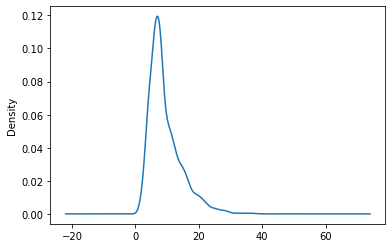

In [ ]:
df_train['Width'].plot.kde()

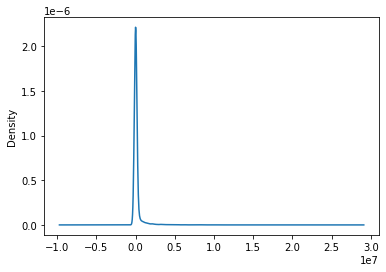

In [ ]:
df_train['Weight'].plot.kde()

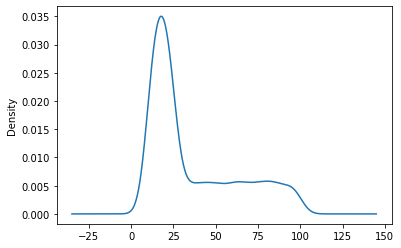

In [ ]:
df_train["Base Shipping Price"].plot.kde()

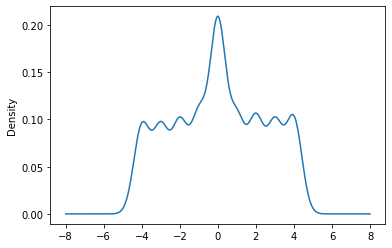

In [ ]:
df_train["Days_Taken"].plot.kde()

In [ ]:
y_train=train_set["Cost"]
X_train=train_set.drop(["Cost"],axis=1)
y_valid=valid_set["Cost"]
X_valid=valid_set.drop(["Cost"],axis=1)
X_test=test_set

In [ ]:
len(X_train.columns)

14

In [ ]:
numerical_columns.remove("Cost")
len(numerical_columns)+len(categorical_columns)

14

In [ ]:
#X_train.drop(X_train[X_train["Weight"]>10000000].index,inplace=True)
#y_train.drop(X_train[X_train["Weight"]>10000000].index,inplace=True)

In [ ]:
#X_train.drop(X_train[X_train["Height"]>60].index,inplace=True)
#y_train.drop(X_train[X_train["Height"]>60].index,inplace=True)

In [ ]:
#X_train.drop(X_train[X_train["Width"]>40].index,inplace=True)
#y_train.drop(X_train[X_train["Width"]>40].index,inplace=True)

In [ ]:
len(y_train)

5004

In [ ]:
'''
train_set_num=train_set[numerical_columns]
valid_set_num=valid_set[numerical_columns]
test_set_num=test_set[numerical_columns]
'''

'\ntrain_set_num=train_set[numerical_columns]\nvalid_set_num=valid_set[numerical_columns]\ntest_set_num=test_set[numerical_columns]\n'

In [ ]:
train_set.describe()

,Artist Reputation,Height,Width,Weight,Base Shipping Price,Cost,Days_Taken
count,4421.000000,4719.000000,4555.000000,4.542000e+03,5004.000000,5004.000000,5004.000000
mean,0.457559,21.370629,9.318551,1.791681e+05,36.003223,2533.080550,0.067746
std,0.264502,11.864420,5.124296,8.681807e+05,26.276581,8807.016398,2.435497
min,0.000000,3.000000,2.000000,4.000000e+00,10.000000,-1970.410000,-4.000000
25%,0.240000,12.000000,6.000000,4.572500e+02,16.457500,193.447500,-2.000000
50%,0.440000,20.000000,8.000000,2.663500e+03,22.810000,385.270000,0.000000
75%,0.670000,29.000000,12.000000,2.564350e+04,53.995000,1069.645000,2.000000
max,1.000000,73.000000,50.000000,1.938877e+07,99.980000,96236.450000,4.000000


In [ ]:
'''
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(
  strategy="median"
)
imputer.fit(train_set_num)
print(imputer.statistics_)
X_train_num=imputer.transform(train_set_num)
X_test_num=imputer.transform(test_set_num)
X_valid_num=imputer.transform(valid_set_num)
'''

'\nfrom sklearn.impute import SimpleImputer\nimputer=SimpleImputer(\n  strategy="median"\n)\nimputer.fit(train_set_num)\nprint(imputer.statistics_)\nX_train_num=imputer.transform(train_set_num)\nX_test_num=imputer.transform(test_set_num)\nX_valid_num=imputer.transform(valid_set_num)\n'

In [ ]:
'''
X_train_cat=train_set[categorical_columns]
X_test_cat=test_set[categorical_columns]
X_valid_cat=valid_set[categorical_columns]'''

'\nX_train_cat=train_set[categorical_columns]\nX_test_cat=test_set[categorical_columns]\nX_valid_cat=valid_set[categorical_columns]'

In [ ]:
'''
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(
  strategy="most_frequent"
)
imputer.fit(X_train_cat) 
X_train_cat=imputer.transform(X_train_cat)
X_test_cat=imputer.transform(X_test_cat)
X_valid_cat=imputer.transform(X_valid_cat)
'''

'\nfrom sklearn.impute import SimpleImputer\nimputer=SimpleImputer(\n  strategy="most_frequent"\n)\nimputer.fit(X_train_cat) \nX_train_cat=imputer.transform(X_train_cat)\nX_test_cat=imputer.transform(X_test_cat)\nX_valid_cat=imputer.transform(X_valid_cat)\n'

In [ ]:
'''
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder(handle_unknown='ignore',drop="first")
cat_encoder.fit(X_train_cat)
X_train_cat=cat_encoder.transform(X_train_cat).toarray()
X_test_cat=cat_encoder.transform(X_test_cat).toarray()
X_valid_cat=cat_encoder.transfor(X_valid_cat).toarray()
'''

'\nfrom sklearn.preprocessing import OneHotEncoder\ncat_encoder=OneHotEncoder(handle_unknown=\'ignore\',drop="first")\ncat_encoder.fit(X_train_cat)\nX_train_cat=cat_encoder.transform(X_train_cat).toarray()\nX_test_cat=cat_encoder.transform(X_test_cat).toarray()\nX_valid_cat=cat_encoder.transfor(X_valid_cat).toarray()\n'

In [ ]:
#X_valid_cat.shape,X_valid_num.shape

NameError: ignored

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
num_pipline=Pipeline([("imputer",SimpleImputer(strategy="median")),
                      ("std_scl",StandardScaler())])
cat_pipeline=Pipeline([("imputer",SimpleImputer(strategy="most_frequent")),
                       ("one_hot_encoder",OneHotEncoder(drop="first"))])

In [ ]:
from sklearn.compose import ColumnTransformer
full_pipeline=ColumnTransformer([
                                 ("num",num_pipline,numerical_columns),
                                 ("cat",cat_pipeline,categorical_columns)
])

In [ ]:
len(numerical_columns+categorical_columns)

14

In [ ]:
X_train

,Artist Reputation,Height,Width,Weight,Material,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Days_Taken
525,0.35,14.0,8.0,18983.0,Marble,27.81,No,No,No,NaN,No,Working Class,No,3
3281,0.77,NaN,8.0,4283.0,NaN,13.66,Yes,No,Yes,Waterways,No,Working Class,No,2
1839,0.81,10.0,NaN,225.0,Clay,21.20,Yes,Yes,No,Airways,Yes,Working Class,No,0
3553,NaN,5.0,NaN,300.0,Bronze,23.55,No,No,No,NaN,No,Working Class,NaN,-4
687,0.19,24.0,12.0,300983.0,Stone,34.90,No,No,No,NaN,No,Working Class,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,0.30,5.0,5.0,100.0,Clay,18.31,Yes,Yes,No,Airways,Yes,Wealthy,Yes,-2
5413,0.43,16.0,6.0,55498.0,Stone,76.24,No,No,Yes,Roadways,No,Working Class,NaN,-2
5448,0.25,14.0,6.0,41940.0,Stone,86.48,No,Yes,No,Roadways,No,Wealthy,No,0
5616,0.82,15.0,7.0,370.0,Aluminium,16.36,No,No,No,Waterways,No,Working Class,No,-4


In [ ]:
X_train=full_pipeline.fit_transform(X_train)
X_test=full_pipeline.transform(X_test)
X_valid=full_pipeline.transform(X_valid)

In [ ]:
X_train[0]

array([-0.42434133, -0.63277381, -0.2447989 , -0.1736495 , -0.31183822,
        1.20408553,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ])

In [ ]:
y_valid

4459    45015.25
1941     2261.35
2296      376.30
3655     1035.52
3316      508.46
          ...   
6313      232.86
4256      713.41
1163      531.89
5283      188.18
3208      374.39
Name: Cost, Length: 1251, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model=LinearRegression()
model.fit(X_train,y_train)
pred_val_lr=model.predict(X_valid)
print(r2_score(y_valid,pred_val_lr))
np.sqrt(mean_squared_error(y_valid,pred_val_lr))

0.31920421736581883


7249.578031437217

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model=RandomForestRegressor()
model.fit(X_train,y_train)
pred_val_rf=model.predict(X_valid)
print(r2_score(y_valid,pred_val_rf))
np.sqrt(mean_squared_error(y_valid,pred_val_rf))

0.5654621285920197


5791.860815101143

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,y_train)
pred_val_XGB=model.predict(X_valid)

print(r2_score(y_valid,pred_val_XGB))
np.sqrt(mean_squared_error(y_valid,pred_val_XGB))

[04:56:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5649262944057412


5795.430723601875

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,np.concatenate((X_train,X_valid)),np.concatenate((y_train,y_valid)),scoring="neg_mean_squared_error",cv=10)
np.mean(np.sqrt(-scores))

[04:59:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

5464.009695811275

In [ ]:
comp=pd.DataFrame()
comp["Actual"]=y_valid
comp["RF"]=pred_val_rf
comp["XGB"]=pred_val_XGB
comp["LR"]=pred_val_lr
comp.to_csv("XYZ_COMP.csv")